In [ ]:
# Data from the "phasediagram.jl" file is used to plot the phase diagram heatmap.
# Data from the "isoR0estimation.jl" file is used to overlay the iso-R0 lines.

In [2]:
# Import phase diagram data
using XLSX
using Plots
default(fmt = :png)

xf = XLSX.readxlsx("Data/phasediagram.xlsx")
sh = xf["Rescaled Grid Data"]

pstep = 0.0025
newpaxis = pstep:pstep:1
τaxis = 1:100


newgrid = zeros(length(newpaxis), length(τaxis))
for r = 1:length(newpaxis)
    for c = 1:length(τaxis)
        newgrid[r, c] = sh[r, c]
    end
end

In [12]:
# R0 data
pdat_r0_0pt5 = [0.5, 0.27, 0.135, 0.0655, 0.0325, 0.01585, 0.007825, 0.0051]
pdat_r0_1 = [1, 0.534, 0.27, 0.135, 0.066, 0.03225, 0.01585,  0.0101]
pdat_r0_2 = [0.557, 0.275, 0.134, 0.0652, 0.03225, 0.0204]
τdat_r0_0pt5 = [1, 2, 4, 8, 16, 32, 64, 100]
τdat_r0_1 = [1, 2, 4, 8, 16, 32, 64, 100]
τdat_r0_2 = [4, 8, 16, 32, 64, 100]
pdat_r0_1pt39 = [0.75, 0.381, 0.1875, 0.092, 0.04525, 0.022475, 0.01412]
τdat_r0_1pt39 = [2, 4, 8, 16, 32, 64, 100]


7-element Array{Int64,1}:
   2
   4
   8
  16
  32
  64
 100

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10331438815373555200\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16541871833393978975\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10331438815373555200\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: Warnings were generated during the last build of PlotlyJS:  please check the build log at /Users/andrewchu/.julia/packages/PlotlyJS/AhkM5/deps/build.log
└ @ PlotlyJS /Users/andrewchu/.julia/packages/PlotlyJS/AhkM5/src/PlotlyJS.jl:85


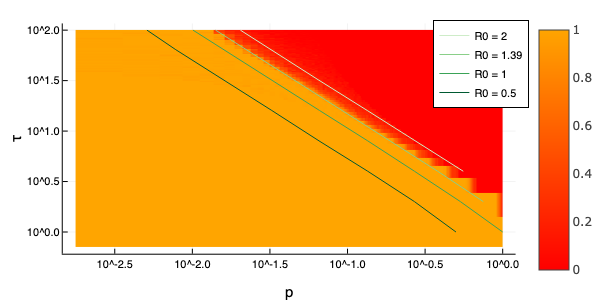

In [13]:
plotlyjs()

heatmap(newpaxis,
        τaxis,
        newgrid,
        # title="Phase Diagram",
        xguide="p", yguide="τ",
        c=cgrad([:red, :orange]),
        transpose = true,
        size=(600, 300),
        xaxis=:log, yaxis=:log)

# Add the iso-R0 lines inset on the heatmap.
# We set the (optional) position relative to bottom-right of the 1st subplot.
# The call is `bbox(x, y, width, height, origin...)`, where numbers are treated as
# "percent of parent".
mypalette = palette(:Greens_8, 4:8)
plot!([pdat_r0_2, pdat_r0_1pt39, pdat_r0_1, pdat_r0_0pt5],
    [τdat_r0_2, τdat_r0_1pt39, τdat_r0_1, τdat_r0_0pt5],
    bg_inside = nothing,
    legend = true,
    label = ["R0 = 2" "R0 = 1.39" "R0 = 1" "R0 = 0.5"],
    xaxis=:log, yaxis=:log,
    background_color_outside = nothing,
    palette = mypalette
)